In [3]:
#Import dependencies
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [4]:
#Open filtered CSV file
traffic_injuries = Path("Resources/road-traffic-injuries-2002-2010.csv")

df = pd.read_csv(traffic_injuries)

# Read in the data. 
df

C:\Users\mahen\AppData\Local\Temp\ipykernel_11392\2141459600.py:4: DtypeWarning: Columns (0,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(traffic_injuries)


,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,35237538.0,28.38,0.0,84.0,28.38,100.0,NaN,1.17,43.0,12/17/13 13:55


In [5]:
#clean data to remove null values and columns 
clean_df = df.drop(columns = ["ind_definition","version"])
clean_df = clean_df.drop(clean_df[clean_df['ind_id'] == "END OF TABLE"].index)
clean_df = clean_df.drop(columns = ["ind_id", 'LL95CI_avmtrate', 'UL95CI_avmtrate',
       'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt', 'CA_RR_avmtrate',
       'groupquarters','LL95CI_poprate', 'UL95CI_poprate',
       'poprate_se', 'poprate_rse', 'CA_decile_pop', 'CA_RR_poprate',
       'avmttotal', 'avmtrate'])
clean_df = clean_df[clean_df['severity'] != 'ND']
clean_df = clean_df[clean_df['mode'] != 'All modes']
clean_df = clean_df[~clean_df['reportyear'].isin(['2002-2004','2005-2007','2008-2010','2006-2010'])]

clean_df

,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,mode,severity,injuries,totalpop,poprate
2,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Killed,7.0,2914663.0,0.24
3,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Severe Injury,49.0,2914663.0,1.68
4,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bus,Severe Injury,1.0,2914663.0,0.03
5,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Killed,130.0,2914663.0,4.46
6,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Severe Injury,488.0,2914663.0,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448943,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Motorcycle,Severe Injury,1.0,NaN,NaN
448944,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Vehicles,Severe Injury,1.0,NaN,NaN
448946,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Car/Pickup,Severe Injury,1.0,16180.0,6.18
448947,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Pedestrian,Severe Injury,1.0,16180.0,6.18


In [6]:
clean_df.isnull().sum()

reportyear           0
geotype              0
geotypevalue         0
geoname              0
county_name       2032
county_fips       2032
region_name     129603
region_code     129603
mode                 0
severity             0
injuries             0
totalpop        142303
poprate         142381
dtype: int64

In [7]:
mode_float = pd.get_dummies(clean_df["mode"], dtype=float)
mode_float

,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
448943,0.0,0.0,0.0,1.0,0.0,0.0,0.0
448944,0.0,0.0,0.0,0.0,0.0,0.0,1.0
448946,0.0,0.0,1.0,0.0,0.0,0.0,0.0
448947,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
#make float for type of severity of accident. Killed or injured
severity_float = pd.get_dummies(clean_df["severity"], dtype=float)
#make float list to concatenate since you cannot merge
floats = [mode_float, severity_float]
severity_float

,Killed,Severe Injury
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,0.0,1.0
...,...,...
448943,0.0,1.0
448944,0.0,1.0
448946,0.0,1.0
448947,0.0,1.0


In [9]:
#concatentate outer to get new df with 1.0 value denoting mode and injury
merged_mode_injury =  pd.concat(floats, axis=1, join="outer")
merged_mode_injury.head()

,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles,Killed,Severe Injury
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
#Create new dataframe, this is better than clean to be referenced when making graphs of data
new_df = pd.DataFrame(
    {"reportyear" : clean_df["reportyear"],
    "county_name" : clean_df["county_name"],
    "region_name" : clean_df["region_name"],
    "region_code" : clean_df["region_code"],
    "Bicyclist" : merged_mode_injury["Bicyclist"],
    "Bus": merged_mode_injury["Bus"],
    "Car/Pickup" : merged_mode_injury["Car/Pickup"],
    "Motorcycle" : merged_mode_injury["Motorcycle"],
    "Pedestrian" : merged_mode_injury["Pedestrian"],
    "Truck" : merged_mode_injury["Truck"],
    "Vehicles" : merged_mode_injury["Vehicles"],
    "Killed" : merged_mode_injury["Killed"],
    "Severe Injury" : merged_mode_injury["Severe Injury"],
    "injuries" : clean_df["injuries"],
    "totalpop" : clean_df["totalpop"],
    "poprate" : clean_df["poprate"]
 }
 )

new_df

,reportyear,county_name,region_name,region_code,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles,Killed,Severe Injury,injuries,totalpop,poprate
2,2002,Orange,Southern California,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2914663.0,0.24
3,2002,Orange,Southern California,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,2914663.0,1.68
4,2002,Orange,Southern California,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2914663.0,0.03
5,2002,Orange,Southern California,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130.0,2914663.0,4.46
6,2002,Orange,Southern California,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,488.0,2914663.0,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448943,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN
448944,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
448946,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16180.0,6.18
448947,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16180.0,6.18


In [11]:
aggregation = clean_df.groupby(["region_name"])["injuries"].agg(['mean','median', 'var', 'std', 'sem','quantile'])
aggregation

,mean,median,var,std,sem,quantile
region_name,,,,,,
Bay Area,14.985835,2.0,5482.731482,74.045469,0.885709,2.0
Butte,9.045649,2.0,415.255056,20.377808,0.769659,2.0
Central/Southeast Sierra,7.088961,1.0,425.393640,20.625073,0.525576,1.0
Monterey Bay,10.384903,2.0,984.445390,31.375873,0.783662,2.0
North Coast,9.040541,1.0,723.364143,26.895430,0.699113,1.0
Northeast Sierra,8.186092,2.0,426.704551,20.656828,0.646474,2.0
Northern Sacramento Valley,8.925134,2.0,294.851528,17.171241,0.724970,2.0
Sacramento Area,14.607990,2.0,3369.565934,58.047962,1.006074,2.0
San Diego,24.501969,3.0,8591.624887,92.691018,1.939075,3.0


In [12]:
# Accidents by year
yearly_accidents = clean_df.groupby('reportyear').size().reset_index(name='count')
yearly_accidents = yearly_accidents.sort_values('reportyear') 
yearly_accidents

,reportyear,count
0,2002,19755
1,2003,19728
2,2004,19957
3,2005,19903
4,2006,20029
5,2007,19729
6,2008,18556
7,2009,17363
8,2010,16639


In [13]:
# Injuries by year
yearly_injuries = clean_df.groupby('reportyear')['injuries'].sum().reset_index()
yearly_injuries

,reportyear,injuries
0,2002,165132.0
1,2003,160846.0
2,2004,163524.0
3,2005,161152.0
4,2006,159340.0
5,2007,157504.0
6,2008,140200.0
7,2009,126938.0
8,2010,118716.0


In [14]:
# Group by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity'])['injuries'].sum().reset_index()
yearwise_severity

,reportyear,severity,injuries
0,2002,Killed,38830.0
1,2002,Severe Injury,126302.0
2,2003,Killed,39286.0
3,2003,Severe Injury,121560.0
4,2004,Killed,37752.0
5,2004,Severe Injury,125772.0
6,2005,Killed,39572.0
7,2005,Severe Injury,121580.0
8,2006,Killed,38450.0
9,2006,Severe Injury,120890.0


In [15]:
# Group by year and mode
yearwise_mode = clean_df.groupby(['reportyear', 'mode'])['injuries'].sum().reset_index()
#yearwise_mode
pivot_data = yearwise_mode.pivot_table(index='reportyear', columns='mode', values='injuries')
pivot_data

mode,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles
reportyear,,,,,,,
2002,3810.0,155.0,64215.0,9405.0,11472.0,1150.0,74925.0
2003,4458.0,245.0,60205.0,10110.0,13278.0,995.0,71555.0
2004,5304.0,150.0,60310.0,10290.0,14490.0,1115.0,71865.0
2005,5262.0,210.0,58610.0,10540.0,15030.0,1070.0,70430.0
2006,5706.0,220.0,56795.0,11580.0,14574.0,935.0,69530.0
2007,5172.0,180.0,54590.0,12820.0,15072.0,1040.0,68630.0
2008,5868.0,375.0,45430.0,13395.0,13992.0,970.0,60170.0
2009,5970.0,345.0,40905.0,11540.0,13728.0,830.0,53620.0
2010,5904.0,155.0,37700.0,11090.0,13452.0,735.0,49680.0


In [16]:
# Accidents by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity']).size().reset_index(name='Accident Count')
yearwise_severity

,reportyear,severity,Accident Count
0,2002,Killed,5953
1,2002,Severe Injury,13802
2,2003,Killed,6101
3,2003,Severe Injury,13627
4,2004,Killed,5985
5,2004,Severe Injury,13972
6,2005,Killed,6117
7,2005,Severe Injury,13786
8,2006,Killed,6193
9,2006,Severe Injury,13836


In [17]:
# Accidents by Region and severity
yearwise_severity = clean_df.groupby(['region_name', 'severity']).size().reset_index(name='Accident Count')
yearwise_severity

,region_name,severity,Accident Count
0,Bay Area,Killed,2361
1,Bay Area,Severe Injury,4628
2,Butte,Killed,252
3,Butte,Severe Injury,449
4,Central/Southeast Sierra,Killed,472
5,Central/Southeast Sierra,Severe Injury,1068
6,Monterey Bay,Killed,480
7,Monterey Bay,Severe Injury,1123
8,North Coast,Killed,481
9,North Coast,Severe Injury,999


In [18]:
# Accidents by Mode and severity
yearwise_severity = clean_df.groupby(['mode', 'severity']).size().reset_index(name='Accident Count')
yearwise_severity 

,mode,severity,Accident Count
0,Bicyclist,Killed,2024
1,Bicyclist,Severe Injury,8636
2,Bus,Killed,155
3,Bus,Severe Injury,453
4,Car/Pickup,Killed,16809
5,Car/Pickup,Severe Injury,36929
6,Motorcycle,Killed,4790
7,Motorcycle,Severe Injury,15077
8,Pedestrian,Killed,7515
9,Pedestrian,Severe Injury,15226


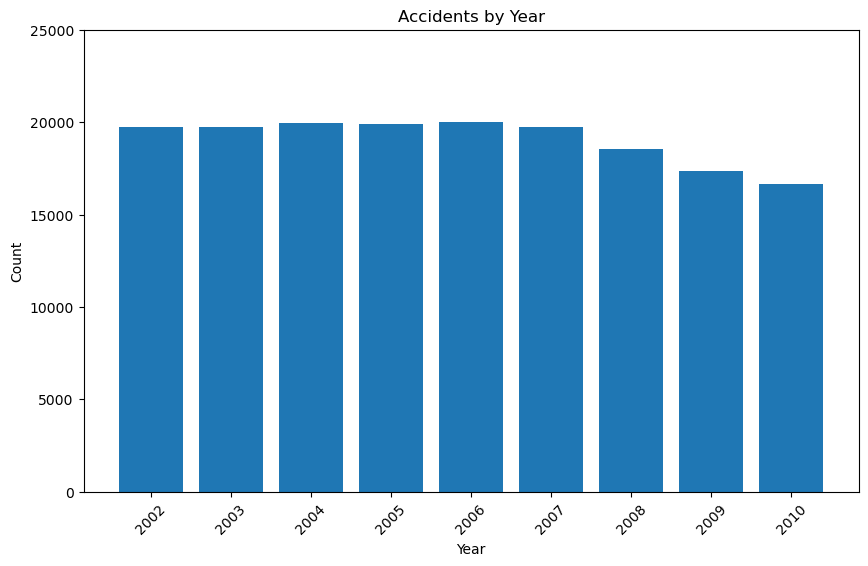

In [19]:
# Create a Bar chart- Accidents by year
yearly_accidents = clean_df.groupby('reportyear').size().reset_index(name='count')
yearly_accidents = yearly_accidents.sort_values('reportyear') 
plt.figure(figsize=(10, 6))
plt.bar(yearly_accidents['reportyear'], yearly_accidents['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0, 25000)
plt.title('Accidents by Year')
plt.xticks(rotation=45)
plt.show()

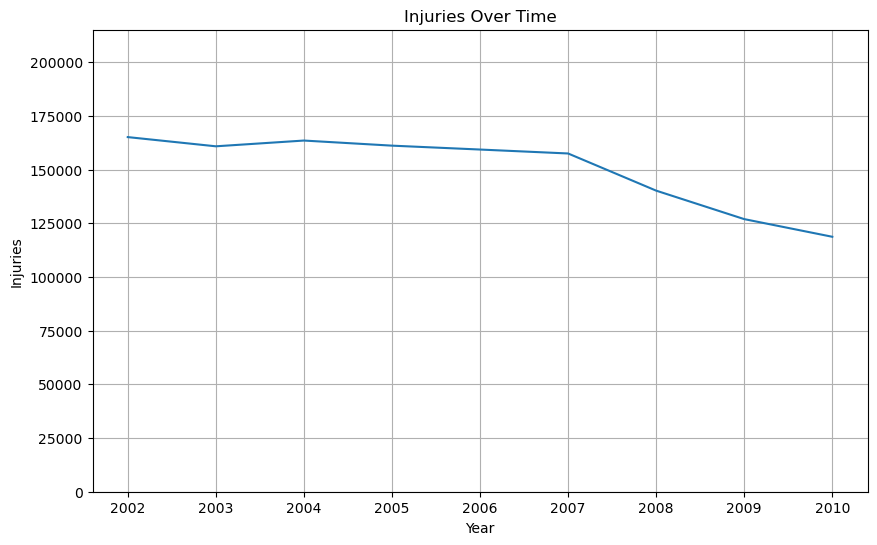

In [20]:
# Create a Line chart Injuries by year
yearly_injuries = clean_df.groupby('reportyear')['injuries'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_injuries['reportyear'], yearly_injuries['injuries'])
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.ylim(0, max(yearly_injuries['injuries']) + 50000)
plt.title('Injuries Over Time')
plt.grid(True) 
plt.show()

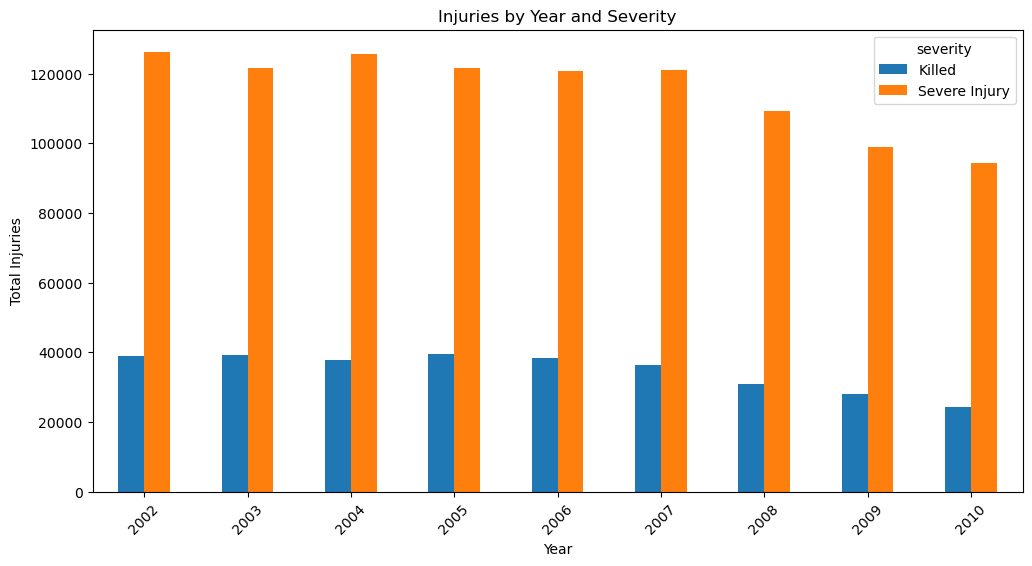

In [21]:
# Create a Bar chart- Group by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity'])['injuries'].sum().reset_index()

pivot_data = yearwise_severity.pivot_table(index='reportyear', columns='severity', values='injuries')
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Injuries by Year and Severity')
plt.xticks(rotation=45)
plt.show()

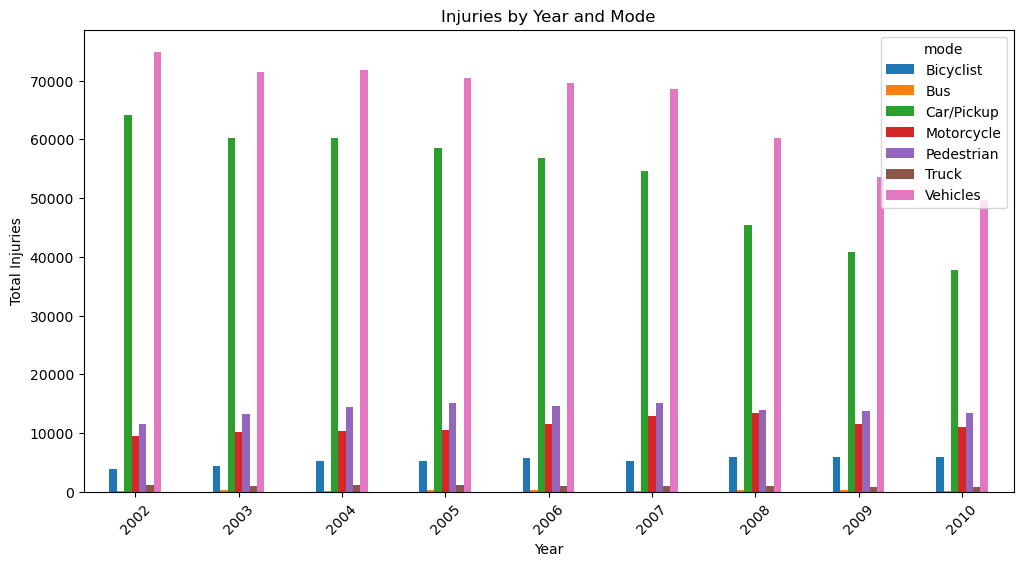

In [22]:
# Create a Bar chart- Group by year and mode
yearwise_mode = clean_df.groupby(['reportyear', 'mode'])['injuries'].sum().reset_index()
pivot_data = yearwise_mode.pivot_table(index='reportyear', columns='mode', values='injuries')
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Injuries by Year and Mode')
plt.xticks(rotation=45)
plt.show()

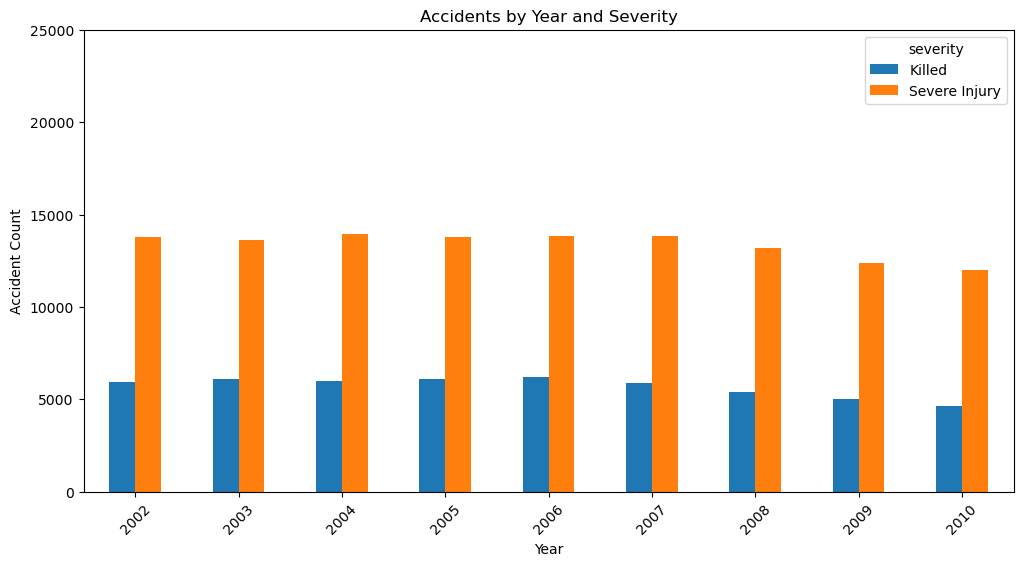

In [23]:
#Create a Bar chart- Accidents by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity']).size().reset_index(name='Accident Count')

pivot_data = yearwise_severity.pivot_table(index='reportyear', columns='severity', values='Accident Count').sort_index(axis=1)

pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.ylim(0, 25000)
plt.title('Accidents by Year and Severity')
plt.xticks(rotation=45)
plt.show()

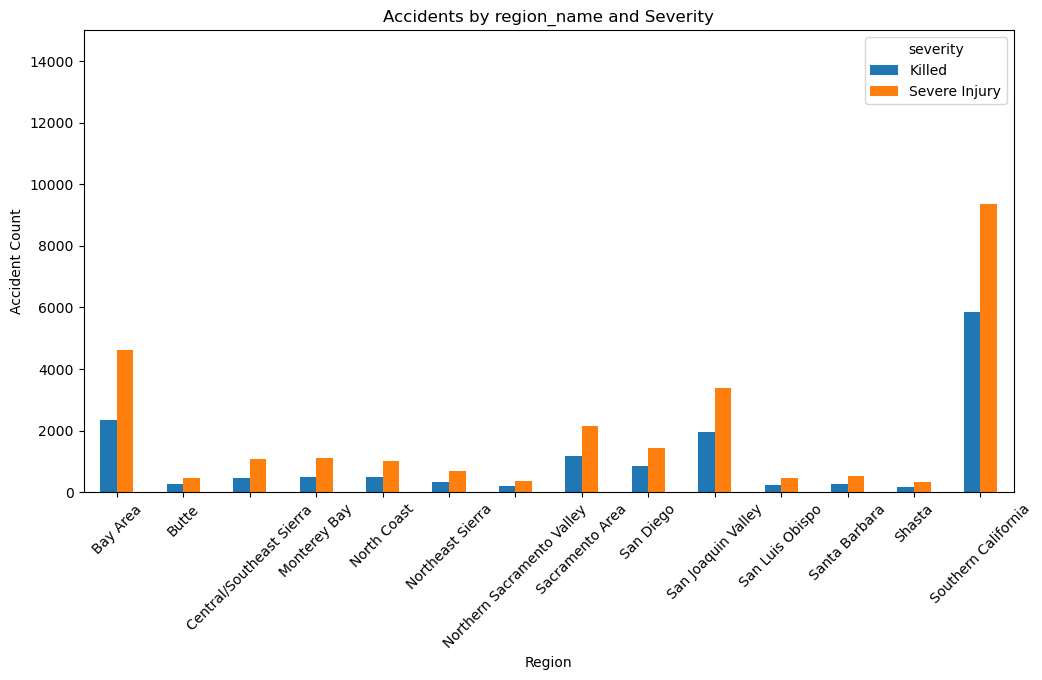

In [24]:
# Create a Bar chart- Accidents by Region and severity
yearwise_severity = clean_df.groupby(['region_name', 'severity']).size().reset_index(name='Accident Count')
pivot_data = yearwise_severity.pivot_table(index='region_name', columns='severity', values='Accident Count').sort_index(axis=1)
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Accident Count')
plt.ylim(0, 15000)
plt.title('Accidents by region_name and Severity')
plt.xticks(rotation=45)
plt.show()

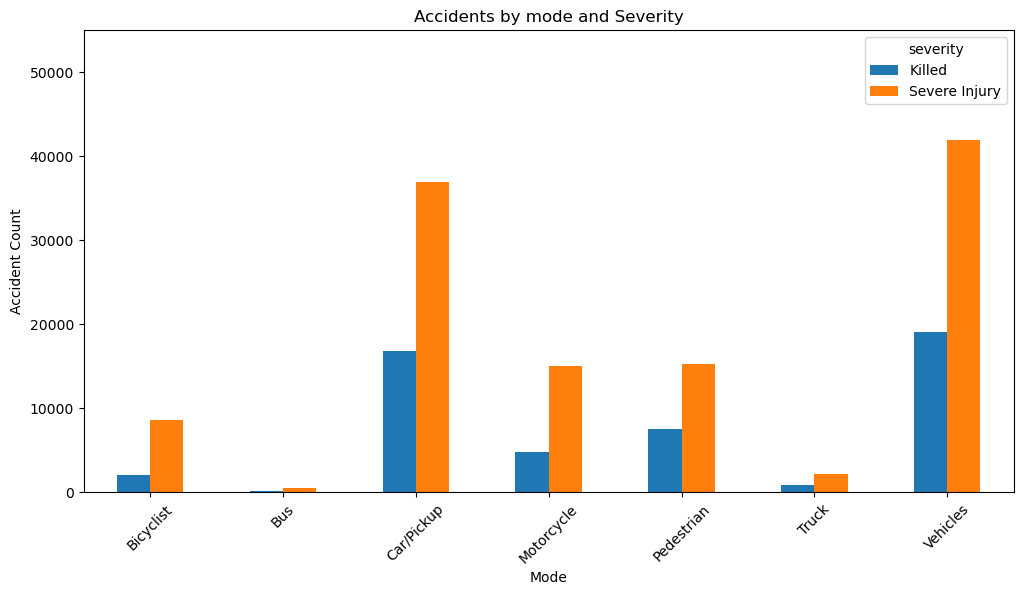

In [25]:
# Create a Bar chart- Accidents by Mode and severity
yearwise_severity = clean_df.groupby(['mode', 'severity']).size().reset_index(name='Accident Count')

pivot_data = yearwise_severity.pivot_table(index='mode', columns='severity', values='Accident Count').sort_index(axis=1)
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Mode')
plt.ylabel('Accident Count')
plt.ylim(0, 55000)
plt.title('Accidents by mode and Severity')
plt.xticks(rotation=45)
plt.show()

In [26]:
#Make graph comparing every mode of travel by every type of injury
#make graph breaking down how many were killed or severly injured by type of travel, maybe calculate it percent to make pie graph or do a bar chart
#compare total accidents per region
#graphs comparing accidnets and miles traveled? Or region and miles traveled? Might help with linear regression later. See comment in box with correlation matrix to see how to use miles traveled
#Do these for every year
#Do these summing up all the years, maybe make dataframes specific to a year
#any other ideas?

In [27]:
#need to do linear regression model of graphs. What does the data tell us? is there trend in injury over year? by region? By mode of transport?
#What about by miles traveled?(this will be found all the way back in beginnning under "df["avmtrate"] look at the excel dictionary I think we can still use this. If used be sure to remove rows are same as clean_df or new_df) 


# Assuming df is your DataFrame
correlation_matrix = clean_df[["geotypevalue","county_fips", "region_code", "injuries", "totalpop", "poprate"]].describe()

#I dont think this is the correlation we are looking for in regard to final project presentation. I think we should make a dataframe that
#is summed up and more about accident per region, modes of transport, and miles traveled.

# Display the correlation matrix
print(correlation_matrix)
#clean_df.info()

       geotypevalue    county_fips   region_code       injuries      totalpop  \
count  1.716590e+05  169627.000000  42056.000000  171659.000000  2.935600e+04   
mean   4.620454e+09    6056.053559      8.897660       7.883956  5.606361e+05   
std    3.602945e+09      27.392990      4.922086     120.673975  2.794148e+06   
min    1.000000e+00    6001.000000      1.000000       1.000000  0.000000e+00   
25%    6.001403e+09    6037.000000      4.000000       1.000000  2.858400e+04   
50%    6.037541e+09    6059.000000     10.000000       1.000000  6.551400e+04   
75%    6.071006e+09    6073.000000     14.000000       3.000000  1.629480e+05   
max    1.000000e+11    6115.000000     14.000000   11411.000000  3.725396e+07   

            poprate  
count  29278.000000  
mean      20.302066  
std      154.221396  
min        0.010000  
25%        2.400000  
50%        5.630000  
75%       14.557500  
max     8737.860000  
